# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\\Users\\figue\\Data Analysis UFC'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_MLRegression.csv'))

In [5]:
pd.set_option('display.max_columns', None)

# Clustering

## Elbow Technique

In [8]:
df.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,date,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
1,1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2,2,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
3,3,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
4,4,Song Kenan,Max Griffin,Keith Peterson,3/20/2021,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America


In [10]:
df = df.drop(columns = ['Unnamed: 0'])

In [11]:
#Creating sub data to remove categorical data
sub = df[['B_age', 'B_wins', 'B Rounds', 'B Title Fights', 'B_current_win_streak', 'B_current_lose_streak',
       'B_longest_win_streak', 'B_losses',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_Weight_lbs', 'R Rounds', 'R Title Fights',
       'R_current_win_streak', 'R_current_lose_streak', 'R_longest_win_streak',
       'R_wins', 'R_losses', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_age', 'R_Weight_lbs']]

In [12]:
sub.head()

,B_age,B_wins,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_losses,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_age,R_Weight_lbs
0,31.0,1,4,0,0,1,1,1,0,0,1,135,1,0,1,0,1,1,0,0,1,0,27.0,135
1,32.0,2,4,0,2,0,2,0,0,1,0,205,17,0,2,0,2,4,2,0,3,0,28.0,185
2,29.0,4,11,1,3,0,3,1,1,2,1,135,30,0,2,0,2,5,6,1,2,2,43.0,135
3,27.0,4,10,0,4,0,4,0,2,0,2,145,18,1,1,0,6,7,1,2,2,2,41.0,155
4,35.0,4,28,0,0,1,1,6,1,2,0,170,10,0,2,0,2,4,1,1,3,0,31.0,170


In [13]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

C:\Users\figue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\figue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\figue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\figue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-13502233.473286409,
 -6396792.113587029,
 -4073567.6830862276,
 -3308686.830615002,
 -2779838.4660580982,
 -2462623.934111376,
 -2280562.39518948,
 -2125455.8115363843,
 -2020668.6041843507]

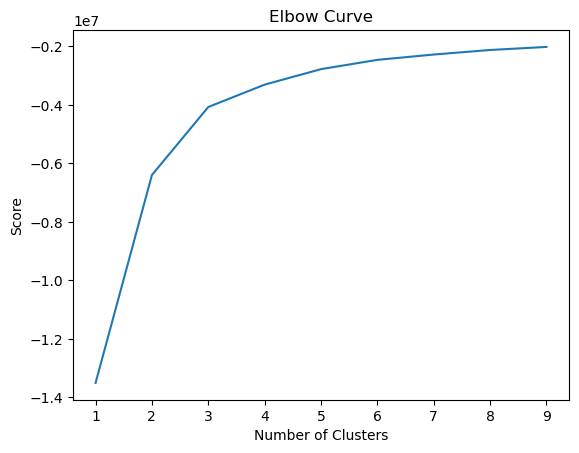

In [16]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## K-means clustering

In [17]:
kmeans = KMeans(n_clusters = 3) 

In [18]:
kmeans.fit(sub)

C:\Users\figue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\figue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\figue\AppData\Local\Temp\ipykernel_29676\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [21]:
sub.head()

,B_age,B_wins,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_losses,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_age,R_Weight_lbs,clusters
0,31.0,1,4,0,0,1,1,1,0,0,1,135,1,0,1,0,1,1,0,0,1,0,27.0,135,2
1,32.0,2,4,0,2,0,2,0,0,1,0,205,17,0,2,0,2,4,2,0,3,0,28.0,185,0
2,29.0,4,11,1,3,0,3,1,1,2,1,135,30,0,2,0,2,5,6,1,2,2,43.0,135,2
3,27.0,4,10,0,4,0,4,0,2,0,2,145,18,1,1,0,6,7,1,2,2,2,41.0,155,2
4,35.0,4,28,0,0,1,1,6,1,2,0,170,10,0,2,0,2,4,1,1,3,0,31.0,170,0


In [22]:
sub['clusters'].value_counts()

clusters
0    2053
2    2015
1     492
Name: count, dtype: int64

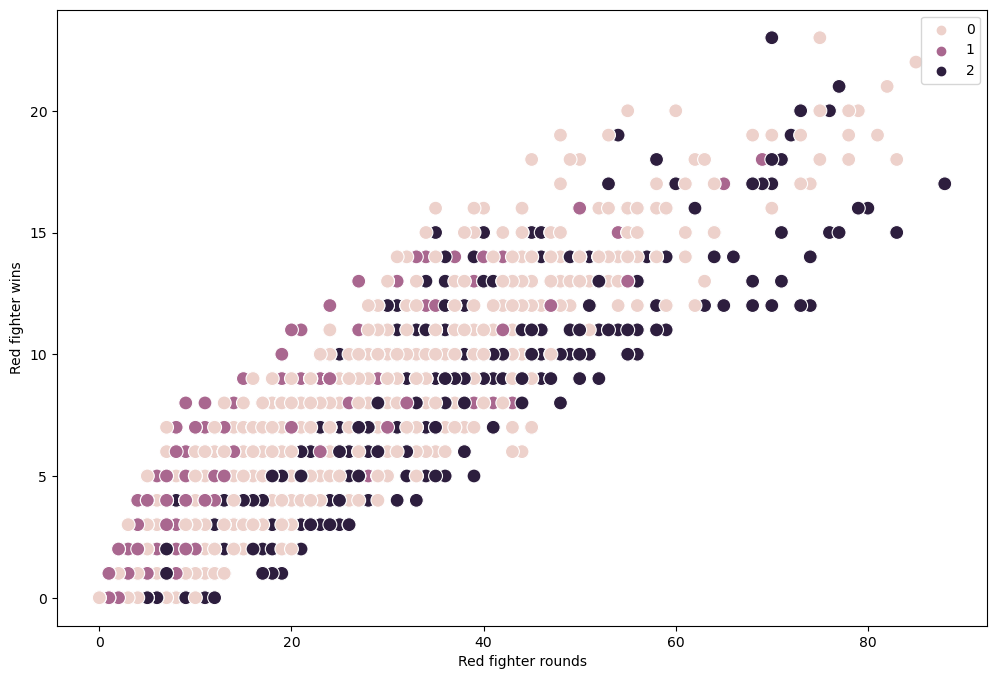

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['R Rounds'], y=sub['R_wins'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Red fighter rounds') # Label x-axis.
plt.ylabel('Red fighter wins') # Label y-axis.
plt.show()

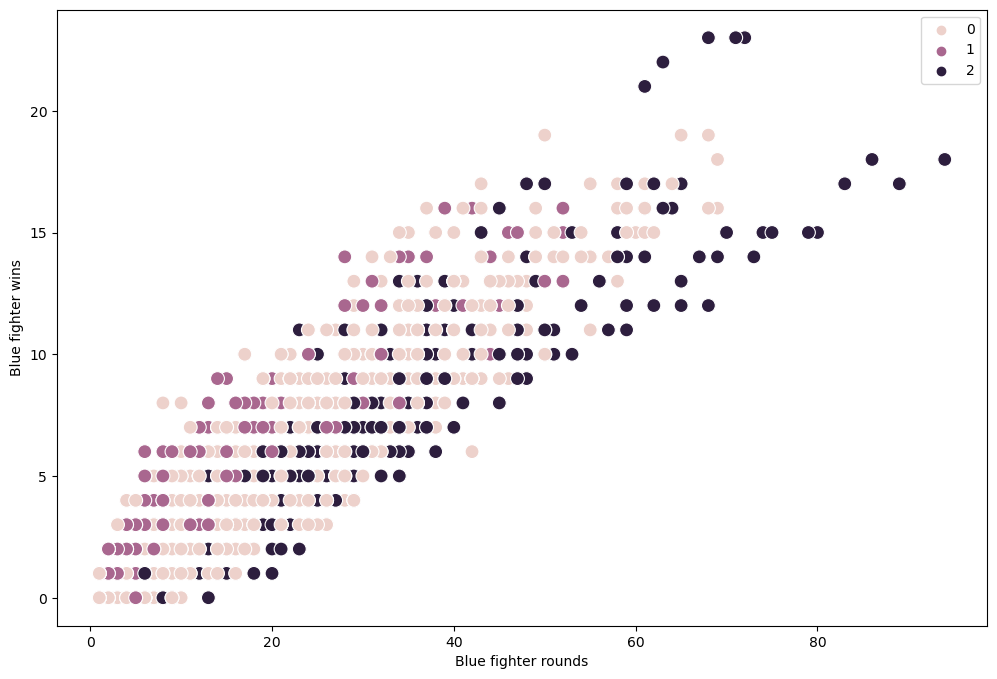

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['B Rounds'], y=sub['B_wins'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Blue fighter rounds') # Label x-axis.
plt.ylabel('Blue fighter wins') # Label y-axis.
plt.show()

In [28]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\figue\AppData\Local\Temp\ipykernel_29676\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [29]:
sub.groupby('cluster').agg({'R Rounds':['mean', 'median'], 
                         'R_wins':['mean', 'median'], 
                         'B Rounds':['mean', 'median'],
                          'B_wins':['mean', 'median']})

R Rounds           R_wins          B Rounds           B_wins  \
                  mean median      mean median       mean median      mean   
cluster                                                                      
dark purple  15.814392   12.0  4.055583    3.0  12.011911    8.0  2.996526   
pink         16.489528   12.0  4.737944    4.0  13.095470    9.0  3.717487   
purple       13.595528   10.0  4.426829    3.0  10.745935    7.0  3.611789   

                    
            median  
cluster             
dark purple    2.0  
pink           3.0  
purple         3.0

In [ ]:
# When comparing red fighter vs blue fighter we can see that Red on average wins more often than Blue.
# It also shows that Red fighters have more stamina as they have longer rounds